# Rapport du TP Motion Planning


AJMI Nohayla

In [ ]:
from part1 import Env, Tree 
from part1 import random_walls , rrt_expansion ,random_expansion
import random
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import collections as mc

# <font color='red'><b>Partie I :<b></font> 

In [ ]:
random.seed(11)

## 1- Comparaison quantitative des performances de l’exploration en evaluant a distance maximale 



In [ ]:
# this  function calculates the max distance from the origin for each tree
def get_max_distance(t, env):
    d = 0
    for s in t.all_nodes:
        d_tmp = Env.dist(t.state, s.state)
        if d_tmp > d:
            d = d_tmp
    return d

### a- Approche à nombre d’itérations constant :

In [ ]:
# Initialisation
env = Env()
random_walls(env, 20)
t_rand_expansion = Tree([-0.5, -0.5])
t_rrt_expansion = Tree([-0.5, -0.5])
fig, ax = plt.subplots()
env.plotwalls(fig, ax)

# Evaluation bases on constant number of itterations
n = int(input("Enter num of iter :"))
for i in range(n + 1):
    rrt_expansion(t_rrt_expansion, env)
    random_expansion(t_rand_expansion, env)
    
t_rand_expansion.plot(fig, ax, "Random expansion")
t_rrt_expansion.plot(fig, ax, "RRT Expansion")
plt.legend()
plt.show()

In [ ]:
d_random_expansion = get_max_distance(t_rand_expansion, env)
d_rrt_expansion = get_max_distance(t_rrt_expansion, env)
print("Performance of random expansion : max distance = ", d_random_expansion)
print("Performance of of rrt expansion : max distance = ", d_rrt_expansion)

### b- Approche à temps de calcul constant :

In [ ]:
# Evaluation bases on constant time execution

del t_rand_expansion, t_rrt_expansion, fig, ax
t_rand_expansion = Tree([-0.5, -0.5])
t_rrt_expansion = Tree([-0.5, -0.5])
fig, ax = plt.subplots()
env.plotwalls(fig, ax)

print("Evaluation bases on constant time execution")
Time = float(input("Enter the time in seconds : "))
print("Distance eval for", Time, "seconds")

end_time = datetime.now() + timedelta(seconds=Time)
while datetime.now() < end_time:
    rrt_expansion(t_rrt_expansion, env)

end_time = datetime.now() + timedelta(seconds=Time)
while datetime.now() < end_time:
    random_expansion(t_rand_expansion, env)

t_rand_expansion.plot(fig, ax, "Random expansion")
t_rrt_expansion.plot(fig, ax, "RRT Expansion")
plt.legend()
plt.show()

In [ ]:
d_random_expansion = get_max_distance(t_rand_expansion, env)
d_rrt_expansion = get_max_distance(t_rrt_expansion, env)
print("Performance of random expansion : max distance = ", d_random_expansion)
print("Performance of of rrt expansion : max distance = ", d_rrt_expansion)

## Interpretation :


### 2- Étude l’impact du nombre de murs de l’environnement sur les performances d’exploration :

### 3- Étude en incluant deux variantes de rrt_expansion() :

In [ ]:
def rrt_expansion_var1(t, env):
    sample = [random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)]
    nearest_neighbor = t
    d = Env.dist(t.state, sample)
    for s in t.all_nodes:  # Naive way to get the nearest neighbor
        d_tmp = Env.dist(s.state, sample)
        if d_tmp < d:
            nearest_neighbor = s
            d = d_tmp
    new_state = env.step(nearest_neighbor.state, Env.random_action())
    if new_state:
        new_node = Tree(new_state, nearest_neighbor, False)
        nearest_neighbor.successors.append(new_node)
        t.all_nodes.append(new_node)


def rrt_expansion_var2(t, env):
    sample = [random.uniform(-1.0, 1.0), random.uniform(-1.0, 1.0)]
    nearest_neighbor = t
    d = Env.dist(t.state, sample)
    for s in random.sample(t.all_nodes + [t], len(t.all_nodes) // 2 + 1):
        d_tmp = Env.dist(s.state, sample)
        if d_tmp < d:
            nearest_neighbor = s
            d = d_tmp
    action = [np.clip(sample[0] - nearest_neighbor.state[0], -0.1, 0.1), np.clip(sample[1] - nearest_neighbor.state[1], -0.1, 0.1)]
    new_state = env.step(nearest_neighbor.state, action)
    if new_state:
        new_node = Tree(new_state, nearest_neighbor, False)
        nearest_neighbor.successors.append(new_node)
        t.all_nodes.append(new_node)

In [ ]:
# Evaluation of variantes of RRT implementaion :

del t_rand_expansion, t_rrt_expansion, fig, ax, env
env = Env()
random_walls(env, 30)
t_rrt_expansion_var1 = Tree([-0.5, -0.5])
t_rrt_expansion_var2 = Tree([-0.5, -0.5])
fig, ax = plt.subplots()
env.plotwalls(fig, ax)

print("Evaluation based on constant time execution of RRT variantes")
Time = float(input("Enter the time in seconds : "))
print("Distance eval for", Time, "seconds")

end_time = datetime.now() + timedelta(seconds=Time)
while datetime.now() < end_time:
    rrt_expansion_var1(t_rrt_expansion_var1, env)

end_time = datetime.now() + timedelta(seconds=Time)
while datetime.now() < end_time:
    rrt_expansion_var2(t_rrt_expansion_var2, env)

t_rrt_expansion_var1.plot(fig, ax, "Variante 1")
t_rrt_expansion_var2.plot(fig, ax, "Variante 2")
plt.legend()
plt.show()

In [ ]:
d_rrt_expansion_var1 = get_max_distance(t_rrt_expansion_var1, env)
d_rrt_expansion_var2 = get_max_distance(t_rrt_expansion_var2, env)
print("Performance of variante 1 : max distance = ", d_rrt_expansion_var1)
print("Performance of variante 2 : max distance = ", d_rrt_expansion_var2)

In [ ]:
del t_rand_expansion, t_rrt_expansion, fig, ax, env


# <font color='red'><b>Partie II :<b></font> 



In [16]:
import numpy as np
import sys
import random
import matplotlib.pyplot as plt
from matplotlib import collections as mc

In [17]:
from part2 import Env, Tree
from part2 import random_walls, rrt_expansion, rrt_expansion_bounded

In [18]:
random.seed(17)

In [19]:
def get_angle(a, b):
    return (np.arctan(b[1] - a[1] / b[0] - a[0]))

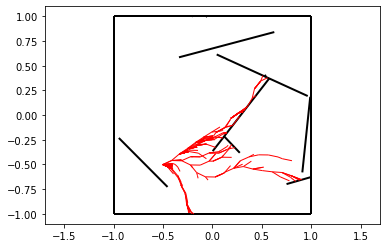

In [20]:
env = Env()
random_walls(env, 10)
t = Tree([-0.5, -0.5], 0.0)
fig, ax = plt.subplots()
env.plotwalls(fig, ax)

for i in range(500):
    rrt_expansion_bounded(t, env)
    
t.plot(fig, ax)
plt.show()

### Interpretation :